In [1]:
%env TOKENIZERS_PARALLELISM=true
! pip install sentence-transformers

env: TOKENIZERS_PARALLELISM=true
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=1123598c3401a1ca0fbb9b2632d638ef58dccad1735ba529dc125189a76a3679
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [2]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/public-opinion-on-democrats-updated-daily/reddit_opinion_democrats.csv', 
                 parse_dates=['created_time', 'user_account_created_time', 'post_created_time'],
                index_col=['comment_id'])
df['text length'] = df['self_text'].str.len()
# let's do some cleanup
df = df[df['author_name'] != '[deleted]']
df = df[df['text length'] > 140]
df.head()

score                                          self_text  \
comment_id                                                             
kcash3z         1  Things are a bit different when sex organs are...   
kcasfkd         1  But if numbers are abstract quantities, then h...   
kcaseus         1  2A gun nut here: The War on Drugs is an abysma...   
kcase9f         1  The worst in my opinion is the "If there were ...   
kcase4d         1  Wow, really? The religious fundamentalist terr...   

                     subreddit        created_time  post_id   author_name  \
comment_id                                                                  
kcash3z           changemyview 2023-12-07 00:02:13  18chp84        Pesec1   
kcasfkd           changemyview 2023-12-07 00:01:54  18ch9ub      Numerend   
kcaseus     WhitePeopleTwitter 2023-12-07 00:01:46  18c8p35  TheSilmarils   
kcase9f             neoliberal 2023-12-07 00:01:39  18bybo9   NeolibShill   
kcase4d               politics 2023-12-07 00:01:37  18ci43f  PRPLpenumbra   

            controversiality  ups  downs user_is_verified  ...  \
comment_id                                                 ...   
kcash3z                    0    1      0             True  ...   
kcasfkd                    0    1      0             True  ...   
kcaseus                    0    1      0             True  ...   
kcase9f                    0    1      0             True  ...   
kcase4d                    0    1      0             True  ...   

           user_comment_karma  user_total_karma  post_score  \
comment_id                                                    
kcash3z              152674.0          153315.0           0   
kcasfkd                1182.0            6535.0           0   
kcaseus               76191.0           79351.0        1220   
kcase9f               84435.0           84702.0           0   
kcase4d               84226.0           84938.0           3   

                                               post_self_text  \
comment_id                                                      
kcash3z     i have never understood why people see this as...   
kcasfkd     In short: I think that because beyond a certai...   
kcaseus                                                   NaN   
kcase9f     The [discussion thread](https://neoliber.al/dt...   
kcase4d                                                   NaN   

                                                   post_title  \
comment_id                                                      
kcash3z     CMV: male gynaecologists “disappearing” from t...   
kcasfkd                        CMV: Large numbers don't exist   
kcaseus     James Comer his own words used against him by ...   
kcase9f                                     Discussion Thread   
kcase4d     Biden says Hamas raped, mutilated women during...   

            post_upvote_ratio  post_thumbs_ups post_total_awards_received  \
comment_id                                                                  
kcash3z                  0.45                0                          0   
kcasfkd                  0.13                0                          0   
kcaseus                  0.99             1220                          0   
kcase9f                  0.49                0                          0   
kcase4d                  0.80                3                          0   

             post_created_time  text length  
comment_id                                   
kcash3z    2023-12-06 23:38:07        169.0  
kcasfkd    2023-12-06 23:18:30        251.0  
kcaseus    2023-12-06 17:09:45        270.0  
kcase9f    2023-12-06 07:00:14        141.0  
kcase4d    2023-12-06 23:57:19        164.0  

[5 rows x 24 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103900 entries, kcash3z to dn64bpd
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   score                       103900 non-null  int64         
 1   self_text                   103900 non-null  object        
 2   subreddit                   103900 non-null  object        
 3   created_time                103900 non-null  datetime64[ns]
 4   post_id                     103900 non-null  object        
 5   author_name                 103900 non-null  object        
 6   controversiality            103900 non-null  int64         
 7   ups                         103900 non-null  int64         
 8   downs                       103900 non-null  int64         
 9   user_is_verified            102771 non-null  object        
 10  user_account_created_time   102771 non-null  datetime64[ns]
 11  user_awardee_karma          103895 no

In [4]:
df.nunique()

score                            821
self_text                     103109
subreddit                         30
created_time                  102584
post_id                         4704
author_name                    34556
controversiality                   2
ups                              821
downs                              1
user_is_verified                   2
user_account_created_time      34149
user_awardee_karma              3583
user_awarder_karma              2389
user_link_karma                10800
user_comment_karma             25912
user_total_karma               26830
post_score                       996
post_self_text                  1153
post_title                      4386
post_upvote_ratio                 98
post_thumbs_ups                  996
post_total_awards_received         1
post_created_time               4699
text length                     3040
dtype: int64

In [5]:
from plotly.express import histogram
histogram(data_frame=df, x='text length', log_y=True)

In [6]:
from plotly.express import bar
bar(data_frame=df['subreddit'].value_counts().to_frame().reset_index(), x='subreddit', y='count')

In [7]:
bar(data_frame=df['author_name'].value_counts().to_frame().reset_index().head(n=70), x='author_name', y='count')

In [8]:
subreddit = ['politics', 'VoteDEM', 'neoliberal', 'conspiracy'][1]
TOP_N = 8
authors = df[df['subreddit'] == subreddit]['author_name'].value_counts().to_frame().reset_index().head(n=TOP_N)['author_name'].tolist()
top_df = df[df['author_name'].isin(authors)][['author_name', 'self_text']]
bar(data_frame=top_df['author_name'].value_counts().to_frame().reset_index(), x='author_name', y='count')

In [9]:
stop_words_df = pd.read_csv(
    header=None,
    filepath_or_buffer='https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK\'s%2520list%2520of%2520english%2520stopwords')
stopwords = stop_words_df[0].tolist()

(-0.5, 1199.5, 1199.5, -0.5)

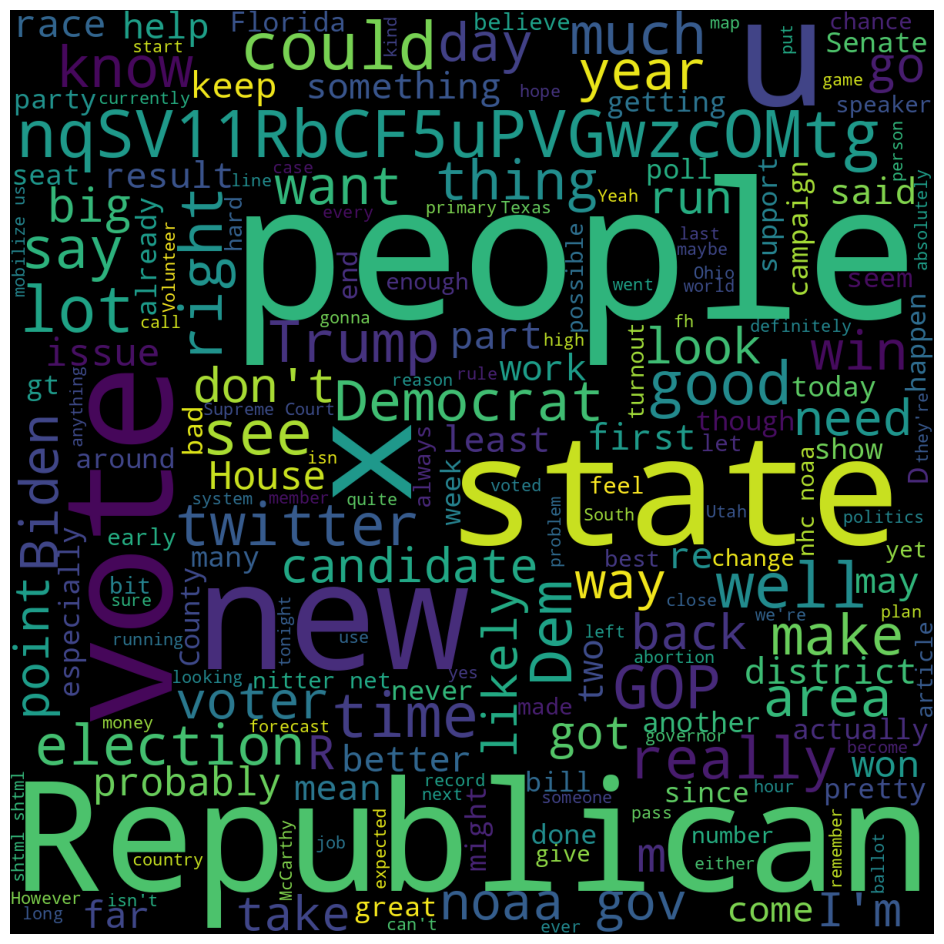

In [10]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud

stopwords = stopwords + ['will', 'https', 'one', 'think', 'status', 'like', 'would', 'get', 'also', 'even', 'going', 'still',
                        'com', 'amp', 'www', ]

FRACTION = 1.0
subplots(figsize=(12, 12))
text = ' '.join(top_df.sample(frac=FRACTION, random_state=2023)['self_text'].values.tolist())
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, stopwords=stopwords,).generate(text=text), )
axis('off')

In [11]:
# https://www.kaggle.com/code/ianalyticsgeek/keywords-extraction-using-bert
from arrow import now
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer

MAX_FEATURES = 100
NGRAM_RANGE = (1, 1)
model_start = now()

vocabulary =  ['2016', '2020', '2024', '46', 'abortion', 'biden', 'climate', 'county', 'democratic', 'democrats', 'dems', 'emotion',
               'family', 'food', 'gaza', 'gop', 'hamas', 'healthcare', 'hurricane', 'israel', 'liberal', 'money', 'noaa', 'polling',
               'president', 'republicans', 'restaurant', 'storm', 'tropical', 'trump', 'twitter', 'vote', 'voters']

# vocabulary = []

print('vocabulary: {}'.format(sorted(vocabulary)))

raw_documents = top_df['self_text'].values.tolist()
# we can use our hard-won list of known keywords or we can take our chances and try to have the vectorizer find it
if len(vocabulary):
    count = TfidfVectorizer(ngram_range=(1, 1),
        vocabulary=vocabulary).fit(raw_documents=raw_documents,)
else:
    count = TfidfVectorizer(ngram_range=NGRAM_RANGE, stop_words=stopwords, max_features=MAX_FEATURES,).fit(raw_documents=raw_documents)
features = count.get_feature_names_out()
print('{}: got {} features'.format(now().time(), len(features)))

# add a feature prevalence counter using a CountVectorizer
feature_count = CountVectorizer(vocabulary=features).fit_transform(raw_documents=raw_documents)
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
print('{}: built model'.format(now().time()))

all_embedding = model.encode(raw_documents + features.tolist())
print('{}: got all embeddings'.format(now().time()))
embedding = all_embedding[:-len(features)]
feature_embeddings = all_embedding[-len(features):]
print('model time: {}'.format(now() - model_start))

vocabulary: ['2016', '2020', '2024', '46', 'abortion', 'biden', 'climate', 'county', 'democratic', 'democrats', 'dems', 'emotion', 'family', 'food', 'gaza', 'gop', 'hamas', 'healthcare', 'hurricane', 'israel', 'liberal', 'money', 'noaa', 'polling', 'president', 'republicans', 'restaurant', 'storm', 'tropical', 'trump', 'twitter', 'vote', 'voters']
17:03:50.084987: got 33 features


17:03:55.067147: built model


Batches:   0%|          | 0/155 [00:00<?, ?it/s]

17:09:10.852210: got all embeddings
model time: 0:05:21.007955


In [12]:
from plotly.express import bar
from plotly.express import treemap
HEAD_N = 70

if len(features) < HEAD_N:
    bar(x='word', y='count',
    data_frame=pd.DataFrame(data={'word': features, 'count': feature_count.toarray().sum(axis=0)}).sort_values(ascending=False, by='count'),        
    ).show()
else:
    treemap(
        path=['word'], names='word', values='count', color='count', height=800,
           color_continuous_scale='bluered',
        data_frame=pd.DataFrame(data={'word': features, 'count': feature_count.toarray().sum(axis=0)}).sort_values(ascending=False, by='count').head(n=min(HEAD_N, len(features))),
    ).show()

In [13]:
from pandas import DataFrame
from plotly.express import scatter
from umap import UMAP

init = ['pca',  'random', 'spectral', 'tswspectral'][0]
columns = ['u0', 'u1', 'u2']
umap_model = UMAP(n_components=3, random_state=2023, verbose=1, init=init, n_jobs=1)
umap_df = DataFrame(data=umap_model.fit_transform(X=embedding,), columns=columns)
umap_df['self_text'] = top_df['self_text'].values.tolist()
umap_df['text length'] = umap_df['self_text'].str.len()
umap_df['author_name'] = top_df['author_name'].values.tolist()
umap_feature_df = DataFrame(data=umap_model.transform(X=feature_embeddings,), columns=columns)
umap_feature_df['word'] = features
umap_feature_df['score'] = count.transform(features).toarray().sum(axis=0)

UMAP(init='pca', n_components=3, n_jobs=1, random_state=2023, verbose=1)
Thu Dec  7 17:09:36 2023 Construct fuzzy simplicial set
Thu Dec  7 17:09:36 2023 Finding Nearest Neighbors
Thu Dec  7 17:09:36 2023 Building RP forest with 9 trees
Thu Dec  7 17:09:41 2023 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	 5  /  12
	Stopping threshold met -- exiting after 5 iterations
Thu Dec  7 17:09:55 2023 Finished Nearest Neighbor Search
Thu Dec  7 17:09:57 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Dec  7 17:10:04 2023 Finished embedding
Thu Dec  7 17:10:06 2023 Worst tree score: 0.48614507
Thu Dec  7 17:10:06 2023 Mean tree score: 0.49834737
Thu Dec  7 17:10:06 2023 Best tree score: 0.51589242
Thu Dec  7 17:10:10 2023 Forward diversification reduced edges from 73620 to 29629
Thu Dec  7 17:10:13 2023 Reverse diversification reduced edges from 29629 to 29629


/opt/conda/lib/python3.10/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



Thu Dec  7 17:10:15 2023 Degree pruning reduced edges from 35394 to 35307
Thu Dec  7 17:10:15 2023 Resorting data and graph based on tree order
Thu Dec  7 17:10:15 2023 Building and compiling search function


Epochs completed:   0%|            0/100 [00:00]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs


In [14]:
from plotly.express import scatter
xy = ['u0', 'u1']

scatter(data_frame=umap_df, x=xy[0], y=xy[1], facet_col='author_name', facet_col_wrap=4, color='text length', hover_data='self_text',
       height=900)

In [15]:
from plotly.graph_objects import Figure
from plotly.graph_objects import Scatter

colors = sorted(['gold', 'gray', 'cyan', 'blue', 'lime', 'navy', 'peru', 'pink', 'plum', 'teal'])
color_map = dict(zip(authors, colors[:len(authors)]))

figure = Figure().update_layout(height=800)
figure.add_trace(Scatter(x=umap_df[xy[0]], y=umap_df[xy[1]], mode='markers', marker=dict(color=umap_df['author_name'].map(color_map), ),
                        text=umap_df['self_text']))
figure.add_trace(Scatter(x=umap_feature_df[xy[0]], y=umap_feature_df[xy[1]], mode='text', text=umap_feature_df['word'], ))
figure.show()